<a href="https://colab.research.google.com/github/anaipsilva/TESE/blob/main/cnn_segunda_vggnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import keras as keras
import matplotlib.pyplot as plt
import csv
import numpy as np
import sys
import sklearn
import os
import cv2
import imutils

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 
from tensorflow.keras import layers
from PIL import Image

In [ ]:
#train_df=pd.read_csv("/content/drive/MyDrive/TESE/X_train.csv")
#valid_df=pd.read_csv("/content/drive/MyDrive/TESE/X_test.csv")

In [ ]:
data_df=pd.read_csv("/content/drive/MyDrive/TESE/X_data.csv")

In [ ]:
data=data_df.values

In [ ]:
data.shape

(18120, 10000)

In [ ]:
#data=data/data.max()

In [ ]:
#x_train=train_df.values
#x_valid=valid_df.values

In [ ]:
#ytrain_df=pd.read_csv("/content/drive/MyDrive/TESE/Labels_train.csv")
#yvalid_df=pd.read_csv("/content/drive/MyDrive/TESE/Labels_test_teste.csv", header=None)

In [ ]:
labels_df=pd.read_csv("/content/drive/MyDrive/TESE/Labels.csv", header=0)

In [ ]:
labels=labels_df['Labels'].values

In [ ]:
x_train, x_aux, y_train, y_aux = train_test_split(data,labels, train_size=0.80, random_state=60, stratify=labels)
x_valid, x_test, y_valid, y_test = train_test_split(x_aux, y_aux , test_size=0.50, random_state=60, stratify=y_aux)

In [ ]:
conta0=0
conta1=0
for i in range(len(labels)):
  label=labels[i]
  if(label==0):
    conta0=conta0+1
  elif(label==1):
    conta1=conta1+1
print(conta0)
print(conta1)

5002
13118


In [ ]:
y_test[1]

1

In [ ]:
conta0=0
conta1=1

for i in range(len(y_valid)):
  aux1=y_valid[i][0]
  if(aux1==0):
    conta1=conta1+1
  elif (aux1==1):
    conta0=conta0+1
print(conta0)
print(conta1)

In [ ]:
y_train[5000]

1

In [ ]:
df = pd.DataFrame(x_train)
df.to_csv(r'/content/drive/MyDrive/TESE/X_train_final.csv', index = False, header=True)

In [ ]:
df_label=pd.DataFrame(y_train)
df_label.to_csv(r'/content/drive/MyDrive/TESE/Y_train_final.csv', index = False, header=True)

In [ ]:
x_train_df_final=pd.read_csv("/content/drive/MyDrive/TESE/X_train_final.csv")
x_train=x_train_df_final.values
#data_df_final.to_csv(r'/content/drive/MyDrive/TESE/X_train_final.csv', index = False, header=True)
#x_train_df=pd.read_csv("/content/drive/MyDrive/TESE/X_train_final.csv")

In [ ]:
y_train_label0_df=pd.read_csv("/content/drive/MyDrive/TESE/Labels_train_final.csv")
y_train=y_train_label0_df.values
#data_df_final.to_csv(r'/content/drive/MyDrive/TESE/Label_train_final.csv', index = False, header=True)
#x_train_df=pd.read_csv("/content/drive/MyDrive/TESE/Label_train_final.csv")

In [ ]:
#y_train=ytrain_df['Labels'].values
#y_valid=yvalid_df['Labels'].values

In [ ]:
y_train.shape

(19498, 2)

In [ ]:
x_train[19000]

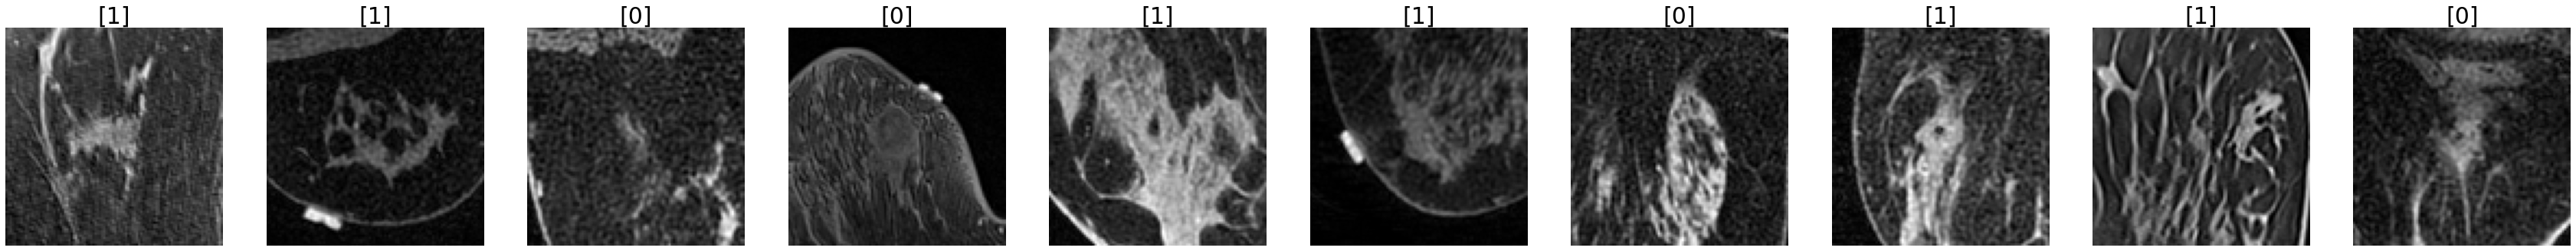

In [ ]:
plt.figure(figsize=(60,60))

num_images = 10
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]
    
    image = row.reshape(100,100)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

In [ ]:
x_train.min()

0.0

In [ ]:
x_train.max()

1.0

In [ ]:
x_valid.max()

0.8542699199390011

In [ ]:
x_test.max()

0.9731223789553946

In [ ]:
x_train = x_train/10492
x_valid = x_valid/10492
x_test  = x_test/10492

In [ ]:
x_train = x_train.reshape(-1,100,100,1)
x_valid = x_valid.reshape(-1,100,100,1)
x_test  = x_test.reshape(-1,100,100,1)

In [ ]:
num_classes=2
if not y_train.shape[-1] == 2:
  y_train=keras.utils.np_utils.to_categorical(y_train, num_classes)
  y_valid=keras.utils.np_utils.to_categorical(y_valid, num_classes)
  y_test=keras.utils.np_utils.to_categorical(y_test, num_classes)

In [ ]:
def balanced_accuracy()

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def model_builder(metrics=METRICS, output_bias=None):
  model = Sequential()
  model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu", input_shape=(100, 100, 1)))
  model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2), strides=2, padding="same"))

  model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu"))
  model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2), strides=2, padding="same"))

  model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2), strides=2, padding="same"))

  model.add(Conv2D(filters=512, kernel_size=3, strides=1, padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=3, strides=1, padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=3, strides=1, padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2), strides=2, padding="same"))
  model.add(BatchNormalization())

  model.add(Conv2D(filters=512, kernel_size=3, strides=1, padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=3, strides=1, padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=3, strides=1, padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2), strides=2, padding="same"))
  model.add(BatchNormalization())

  model.add(Flatten())
  model.add(Dense(units=1024, activation="relu"))
  model.add(Dropout(0.3))
  model.add(Dense(units=num_classes, activation="softmax"))

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                loss=keras.losses.BinaryCrossentropy(),
                metrics=metrics, 
                )
  return model

In [ ]:
model = model_builder()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 100, 100, 64)      640       
                                                                 
 conv2d_40 (Conv2D)          (None, 100, 100, 64)      36928     
                                                                 
 batch_normalization_15 (Bat  (None, 100, 100, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 50, 50, 128)       73856     
                                                                 
 conv2d_42 (Conv2D)          (None, 50, 50, 128)      

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=True, # randomly flip images vertically
)  

In [ ]:
datagen.fit(x_train)

In [ ]:
batch_size = 128
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

x, y = img_iter.next()
#fig, ax = plt.subplots(nrows=8, ncols=8)
#for i in range(batch_size):
 #   image = x[i]
  #  ax.flatten()[i].imshow(np.squeeze(image))
#plt.show()

In [ ]:
#model = Sequential()
#model.add(Dense(units = 512, activation='relu', input_shape=(10000,)))
#model.add(Dense(units = 512, activation='relu'))
#model.add(Dense(units = num_classes, activation='softmax'))

In [ ]:
#history=model.fit(img_iter, epochs=20, steps_per_epoch=len(x_train)/batch_size, validation_data=(x_valid, y_valid))

Epoch 1/20
152/152 [==============================] - 79s 496ms/step - loss: 0.8366 - tp: 10350.0000 - fp: 9148.0000 - tn: 10350.0000 - fn: 9148.0000 - accuracy: 0.5308 - precision: 0.5308 - recall: 0.5308 - auc: 0.5327 - prc: 0.5210 - val_loss: 0.6682 - val_tp: 1312.0000 - val_fp: 500.0000 - val_tn: 1312.0000 - val_fn: 500.0000 - val_accuracy: 0.7241 - val_precision: 0.7241 - val_recall: 0.7241 - val_auc: 0.7247 - val_prc: 0.6868
Epoch 2/20
152/152 [==============================] - 73s 477ms/step - loss: 0.6892 - tp: 10610.0000 - fp: 8888.0000 - tn: 10610.0000 - fn: 8888.0000 - accuracy: 0.5442 - precision: 0.5442 - recall: 0.5442 - auc: 0.5538 - prc: 0.5437 - val_loss: 0.6461 - val_tp: 1312.0000 - val_fp: 500.0000 - val_tn: 1312.0000 - val_fn: 500.0000 - val_accuracy: 0.7241 - val_precision: 0.7241 - val_recall: 0.7241 - val_auc: 0.7248 - val_prc: 0.6868
Epoch 3/20
152/152 [==============================] - 73s 476ms/step - loss: 0.6876 - tp: 10666.0000 - fp: 8832.0000 - tn: 10666.0

In [ ]:
history=model.fit(x_train, y_train, batch_size=128, epochs=30, verbose=1, validation_batch_size=128,validation_data=(x_valid, y_valid))

Epoch 1/30
153/153 [==============================] - 77s 484ms/step - loss: 0.5214 - tp: 14835.0000 - fp: 4663.0000 - tn: 14835.0000 - fn: 4663.0000 - accuracy: 0.7608 - precision: 0.7608 - recall: 0.7608 - auc: 0.8409 - prc: 0.8362 - val_loss: 0.5908 - val_tp: 1312.0000 - val_fp: 500.0000 - val_tn: 1312.0000 - val_fn: 500.0000 - val_accuracy: 0.7241 - val_precision: 0.7241 - val_recall: 0.7241 - val_auc: 0.7205 - val_prc: 0.6825
Epoch 2/30
153/153 [==============================] - 73s 476ms/step - loss: 0.2946 - tp: 17060.0000 - fp: 2438.0000 - tn: 17060.0000 - fn: 2438.0000 - accuracy: 0.8750 - precision: 0.8750 - recall: 0.8750 - auc: 0.9459 - prc: 0.9438 - val_loss: 0.5889 - val_tp: 1312.0000 - val_fp: 500.0000 - val_tn: 1312.0000 - val_fn: 500.0000 - val_accuracy: 0.7241 - val_precision: 0.7241 - val_recall: 0.7241 - val_auc: 0.7431 - val_prc: 0.7006
Epoch 3/30
153/153 [==============================] - 72s 474ms/step - loss: 0.1615 - tp: 18291.0000 - fp: 1207.0000 - tn: 18291.0

In [ ]:
model.save('/content/drive/MyDrive/TESE/model_vgg6_11_0_0001')
model.save('/content/drive/MyDrive/TESE/model_vgg6_11_0_0001/model.h5')

In [ ]:
#Select the index of image to be loaded for testing
TP=0
TN=0
FP=0
FN=0
for i in range(len(x_test+1)):
  img = x_test[i]
  image = img.reshape(100,100)
  #plt.imshow(image)
  input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
  output=model.predict(input_img)
  print("The prediction for this image is: ", output)
  print("The actual label for this image is: ", y_test[i])
  if(output[0][0] > output[0][1] and y_test[i][0] == 1):
    TN=TN+1
    #print("ER neg")
  elif(output[0][0] > output[0][1] and y_test[i][0] == 0):
    FN=FN+1
  elif(output[0][1] > output[0][0] and y_test[i][1] == 1):
    TP=TP+1
  elif(output[0][1] > output[0][0] and y_test[i][1] == 0):
    FP=FP+1
    #print('ER pos')
print("Total of TP=", TP )
print("Total of TN=", TN )
print("Total of FP=", FP )
print("Total of FN=", FN )
sensitivity=TP/(TP+FN)
specificity=TN/(TN+FP)
bacc= (sensitivity + specificity)/2
print("Balanced accuracy =", bacc)

A saída de streaming foi truncada nas últimas 5000 linhas.
1/1 [==============================] - 0s 18ms/step
The prediction for this image is:  [[1.2519298e-14 1.0000000e+00]]
The actual label for this image is:  [0. 1.]
1/1 [==============================] - 0s 18ms/step
The prediction for this image is:  [[3.735314e-17 1.000000e+00]]
The actual label for this image is:  [0. 1.]
1/1 [==============================] - 0s 18ms/step
The prediction for this image is:  [[4.612916e-11 1.000000e+00]]
The actual label for this image is:  [0. 1.]
1/1 [==============================] - 0s 21ms/step
The prediction for this image is:  [[1.5078463e-12 1.0000000e+00]]
The actual label for this image is:  [0. 1.]
1/1 [==============================] - 0s 20ms/step
The prediction for this image is:  [[2.166775e-21 1.000000e+00]]
The actual label for this image is:  [0. 1.]
1/1 [==============================] - 0s 18ms/step
The prediction for this image is:  [[1.6229258e-14 1.0000000e+00]]
The actu

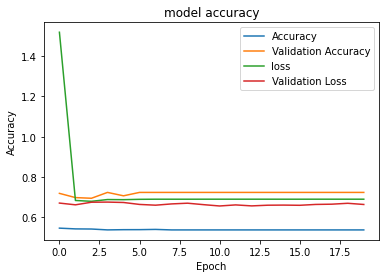

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

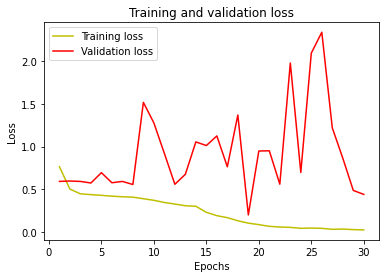

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

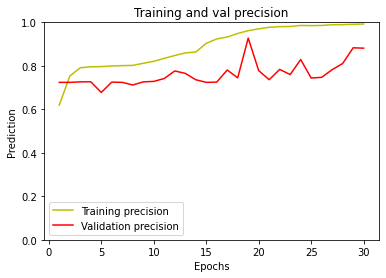

In [ ]:
precision = history.history['precision']
val_precision = history.history['val_precision']
ymin=0
ymax=1
plt.plot(epochs, precision, 'y', label='Training precision')
plt.plot(epochs, val_precision, 'r', label='Validation precision')
plt.ylim([ymin, ymax])
plt.title('Training and val precision')
plt.xlabel('Epochs')
plt.ylabel('Prediction')
plt.legend()
plt.show()

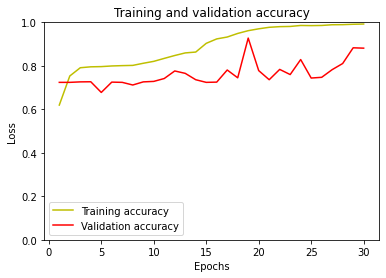

In [ ]:
#plot the training and validation accuracy and loss at each epoch
ymin=0
ymax=1
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.ylim([ymin, ymax])
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

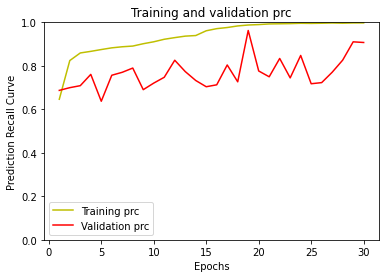

In [ ]:
prc = history.history['prc']
val_prc = history.history['val_prc']
ymin=0
ymax=1
plt.plot(epochs, prc, 'y', label='Training prc')
plt.plot(epochs, val_prc, 'r', label='Validation prc')
plt.ylim([ymin, ymax])
plt.title('Training and validation prc')
plt.xlabel('Epochs')
plt.ylabel('Prediction Recall Curve')
plt.legend()
plt.show()

In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

57/57 [==============================] - 2s 38ms/step


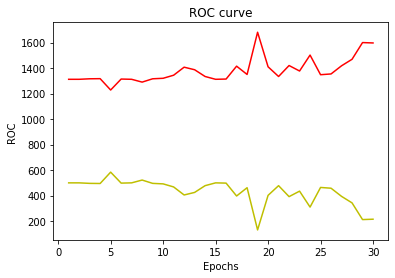

In [ ]:
#ROC
from sklearn.metrics import roc_curve
y_preds = model.predict(x_test).ravel()
thresholds=0.908
fp = history.history['val_fp']
tp = history.history['val_tp']
#fp, tp, thresholds = roc_curve(y_valid, y_preds).ravel
plt.figure(1)
plt.plot(epochs, fp, 'y', label='False positive rate')
plt.plot(epochs, tp, 'r', label='True positive rate')
#plt.plot(tpr, prc, 'r', label='Training prc')
plt.xlabel('Epochs')
plt.ylabel('ROC')
plt.title('ROC curve')
plt.show()

In [ ]:
n=220 #Select the index of image to be loaded for testing
img = x_valid[n]
image = img.reshape(100,100)
plt.imshow(image)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_valid[n])

In [ ]:
y_test[2][1]


1.0

In [ ]:
conta0=0
conta1=1

for i in range(len(y_test)):
  aux1=y_test[i][0]
  #aux2=y_test[i][1]
  if(aux1==0):
    conta1=conta1+1
  elif (aux1==1):
    conta0=conta0+1
print(conta0)
print(conta1)

500
1313


In [ ]:
#Select the index of image to be loaded for testing
TP=0
TN=0
FP=0
FN=0
for i in range(len(x_test+1)):
  img = x_test[i]
  image = img.reshape(100,100)
  #plt.imshow(image)
  input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
  output=model.predict(input_img)
  print("The prediction for this image is: ", output)
  print("The actual label for this image is: ", y_test[i])
  if(output[0][0] > output[0][1] and y_test[i][0] == 1):
    TN=TN+1
    #print("ER neg")
  elif(output[0][0] > output[0][1] and y_test[i][0] == 0):
    FP=FP+1
  elif(output[0][1] > output[0][0] and y_test[i][1] == 1):
    TP=TP+1
  elif(output[0][1] > output[0][0] and y_test[i][1] == 0):
    FN=FN+1
    #print('ER pos')
print("Total of TP=", TP )
print("Total of TN=", TN )
print("Total of FP=", FP )
print("Total of FN=", FN )
sensitivity=TP/(TP+FN)
specificity=TN/(TN+FP)
bacc= (sensitivity + specificity)/2
print("Balanced accuracy =", bacc)

A saída de streaming foi truncada nas últimas 5000 linhas.
1/1 [==============================] - 0s 16ms/step
The prediction for this image is:  [[4.342593e-11 1.000000e+00]]
The actual label for this image is:  [0. 1.]
1/1 [==============================] - 0s 19ms/step
The prediction for this image is:  [[1.0596571e-11 1.0000000e+00]]
The actual label for this image is:  [0. 1.]
1/1 [==============================] - 0s 19ms/step
The prediction for this image is:  [[0.03949386 0.96050614]]
The actual label for this image is:  [0. 1.]
1/1 [==============================] - 0s 19ms/step
The prediction for this image is:  [[9.9955410e-01 4.4588483e-04]]
The actual label for this image is:  [0. 1.]
1/1 [==============================] - 0s 19ms/step
The prediction for this image is:  [[1.8102121e-09 1.0000000e+00]]
The actual label for this image is:  [0. 1.]
1/1 [==============================] - 0s 17ms/step
The prediction for this image is:  [[6.1771845e-21 1.0000000e+00]]
The actual